PEQUENO TESTE 03

Este pequeno teste aborda a aplicação do método Quasi-Newton DFP sobre o 
seguinte problema de otimização irrestrita:

    Minimizar f(x) = 100*(x2-x1^3)^2 + (x1-1)^2

O desafio neste teste é implementar a atualização da aproximação da inversa da 
matriz hessiana. A atualização dessa aproximação é realizada na linha 106. 
Você só precisa implementar o termo que atualiza a matriz Hh. Use como 
referência a equação (25) dos slides da Unidade 3 (slide 62).

Lembre-se que você vai precisar realizar o produto entre os vetores v e r
para atualizar a matriz Hh. O produto vetorial é obtido pelo operador @. Você
também vai precisar transpor vetores. A transposição é obtida pelo operador T.
Por exemplo, se v é um vetor, v.T é a transposta de v. Exemplo de 
multiplicação: v @ v.T

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize as opt

# Solução inicial
x0 = [-1.5, -1.5]

# Função objetivo
def funobj(x):
    x = x.flatten()
    x1, x2 = x[0], x[1]
    fx = 100*(x2-x1**3)**2 + (x1-1)**2
    return fx

# Calculo numérico das derivadas
def gradiente(x, fx, func, delta=1e-10):

    # Inicializa o vetor gradiente
    grad = np.zeros(x.shape)
    
    # Para cada variável
    for n in range(x.size):
        
        # Vetor com 1 na posição da variável onde a derivada será calculada
        e = np.zeros(x.shape)
        e[n] = 1
        
        # Calcula a derivada
        grad[n] = (func(x + delta*e) - fx)/delta
            
    return grad

### Atualização do método DFP

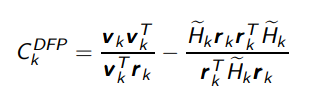

Número de avaliações: 1419


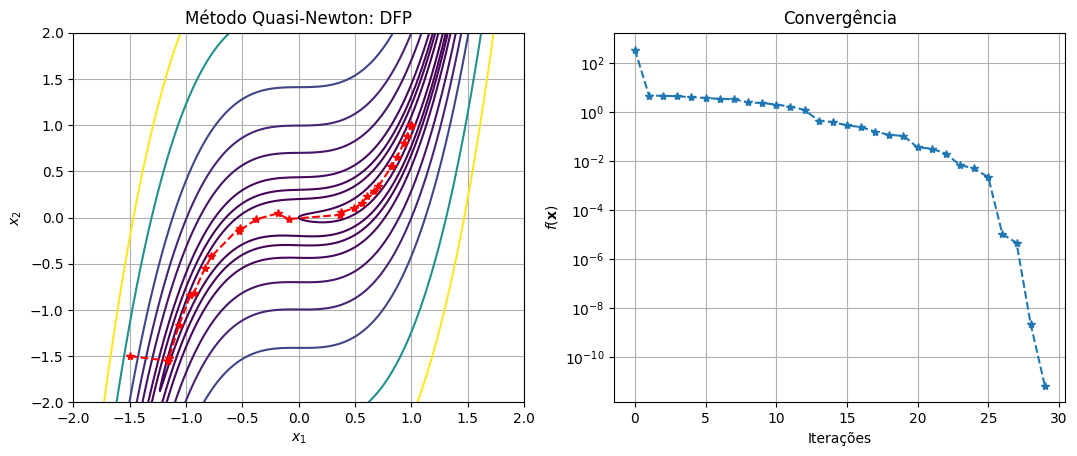

In [4]:
# Parâmetros iniciais
x = np.array(x0).reshape((-1, 1)) # Ponto inicial
n = x.size # Número de variáveis
fx = funobj(x) # Valor da função no ponto inicial
navaliacoes = 1 # Número de avaliações da função
xlist = [x.copy()] # Lista histórica de pontos
fxlist = [fx] # Lista histórica de valores da função
it = 0 # Contador de iterações

# Aproximação inicial da inversa da matriz hessiana
Hh = np.eye(x.size)

# Primeira estimativa do gradiente
g = gradiente(x, fx, funobj)
navaliacoes += n

# Critério de parada: gradiente próximo de zero (condição de 1a ordem)
while np.linalg.norm(g) > 1e-3:
    
    # Determina a direção de busca
    d = - Hh @ g
    
    # Função de otimização unidimensional
    def theta(a):
        return funobj(x + a*d)

    # Determina o passo ótimo    
    resultado = opt.minimize_scalar(theta, method='golden')
    alpha = resultado.x
    navaliacoes += resultado.nfev

    # Grava informações antes do passo
    xanterior = x.copy()
    ganterior = g.copy()
    
    # Dá o passo
    x = x + alpha * d
    fx = funobj(x) # Avalia a função no novo ponto
    navaliacoes += 1
    
    # Estima novo gradiente
    g = gradiente(x, fx, funobj) 
    navaliacoes += n
    
    # Atualiza histórico
    xlist.append(x.copy())
    fxlist.append(fx)

    # Atualiza vetores v e r
    v = xanterior-x
    r = ganterior-g

    """ IMPLEMENTE AQUI A ATUALIZAÇÃO DA APROXIMAÇÃO DA INVERSA DA HESSIANA 
    atualização da aproximação da inversa da matriz hessiana.
    """
    #Hh = Hh + ???? # A atualização eh feita com a utilização do método DFP.
    
    #Hh = Hh + 1/(r.T@v - r.T@Hh@r)*(v-Hh@r)@(v-Hh@r).T
    
    # Termo 1: v v^T / (v^T r)
    term1 = (v @ v.T) / (v.T @ r)

    # Termo 2: (Hh r)(Hh r)^T / (r^T Hh r)
    Hr = Hh @ r
    term2 = (Hr @ Hr.T) / (r.T @ Hr)

    # Atualização da inversa da Hessiana usando DFP
    Hh = Hh + term1 - term2

    # Atualiza contador
    it += 1

# Converte listas para arrays
xlist = np.array(xlist).reshape((-1, n))
fxlist = np.array(fxlist)

# Imprime resultados
print('Número de avaliações: %d' % navaliacoes)

# Malha para plotar contorno
x1, x2 = np.meshgrid(np.linspace(-2, 2, 500),
                     np.linspace(-2, 2, 500))

# Avalia função para plotar contorno
f = np.zeros(x1.shape)
for i in range(x1.shape[0]):
    for j in range(x1.shape[1]):
        f[i, j] = funobj(np.array([x1[i, j], x2[i, j]]))

# Plota trajetória	
fig, axis = plt.subplots(1, 2, figsize=[2*6.4, 4.8])
axis[0].contour(x1, x2, f, levels=[0, 1, 5, 10, 20, 50, 100, 200, 500, 1000])
axis[0].plot(xlist[:, 0], xlist[:, 1], '--*r')
axis[0].set_xlabel(r'$x_1$')
axis[0].set_ylabel(r'$x_2$')
axis[0].set_title('Método Quasi-Newton: DFP')
axis[0].grid()

# Plota convergência
axis[1].plot(fxlist, '--*')
axis[1].set_yscale('log')
axis[1].set_xlabel('Iterações')
axis[1].set_ylabel(r'$f(\mathbf{x})$')
axis[1].set_title('Convergência')
axis[1].grid()

plt.show()